# Example 18.3.8 Pertubated Coulomb Potential (PCP)

We want to implement the example 18.3.8 in the book Tractability of Multivariate Problems Vol 2 for 2 particles
The function itself is 
$$f(x_1,x_2,\dots,x_l) = \sum_{1\leq i < j \leq l}\left(\frac{1}{\sqrt{||x_i-x_j||^{2}_{2}+\alpha}}\right)$$
Where x_i, i = 1,2,...,l are three dimensional vectors. We first choose l = 2. Using the results of the example we calculate the function by integrating 
$$\tilde{f}_{\alpha}(z_1, z_2, \dots, z_{3l})=\left(\prod^{6-1}_{j = 1}\left(j+\frac{1}{2}\right)\right) \cdot \frac{(z_1-z_4)^4(z_2-z_5)^4(z_3-z_6)^4}{((z_1-z_4)^2+(z_2-z_5)^2+(z_3-z_6)^2+\alpha)^{13}}$$
over the interval [0,1]⁶. For higher dimension the algorithm gets extremely slow. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time as time
import numpy as np
import pandas as bearcats
import scipy.integrate
import sympy 

import os
os.chdir("..")
import Methodes.Smolyak_one as Smolyak_one
import Methodes.Smolyak_three as Smolyak_three


## Results of approximations

We calculated the integral for $\alpha = 10^{-i}$ for in $i = 0, \dots, 5$ using different quadratures up to a degree of approximation of up to 23, depending on the runtime of the algorithm. Furthermore  it was possible to calculate the integral for $i = 0$ and $i=1$ in an acceptable amount of time and with a sufficient accuracy. On this basis we also show  a lower bound of the integral for the smaller $\alpha$  which was estimated on page 393 of the same book. First we show the results of the approximation. 

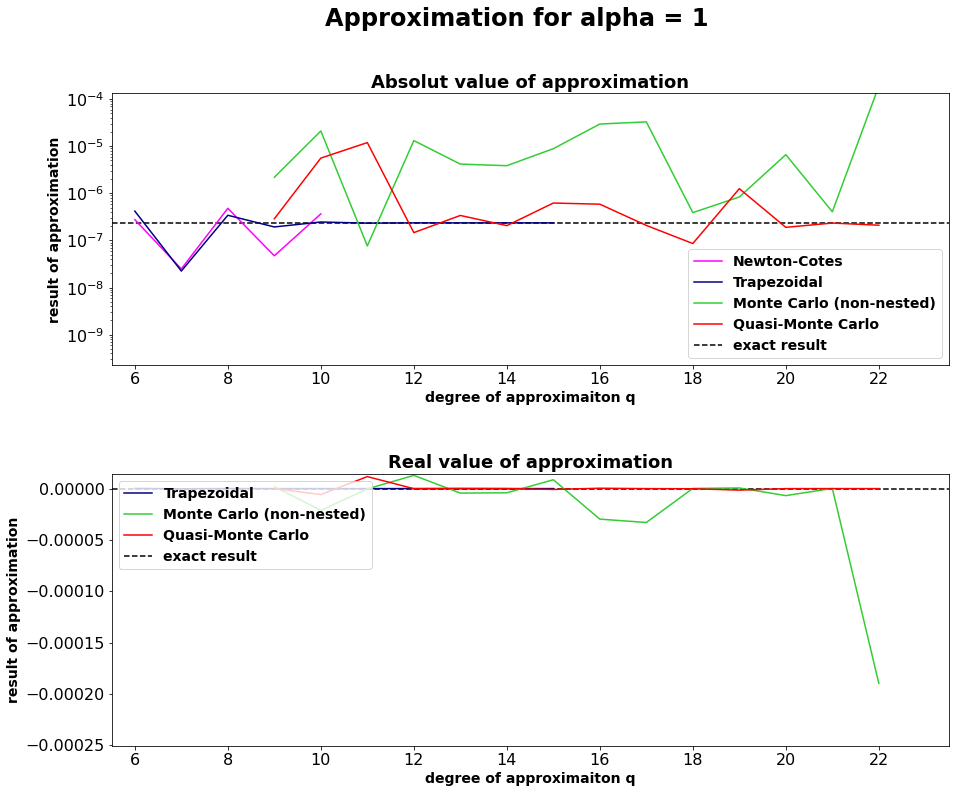

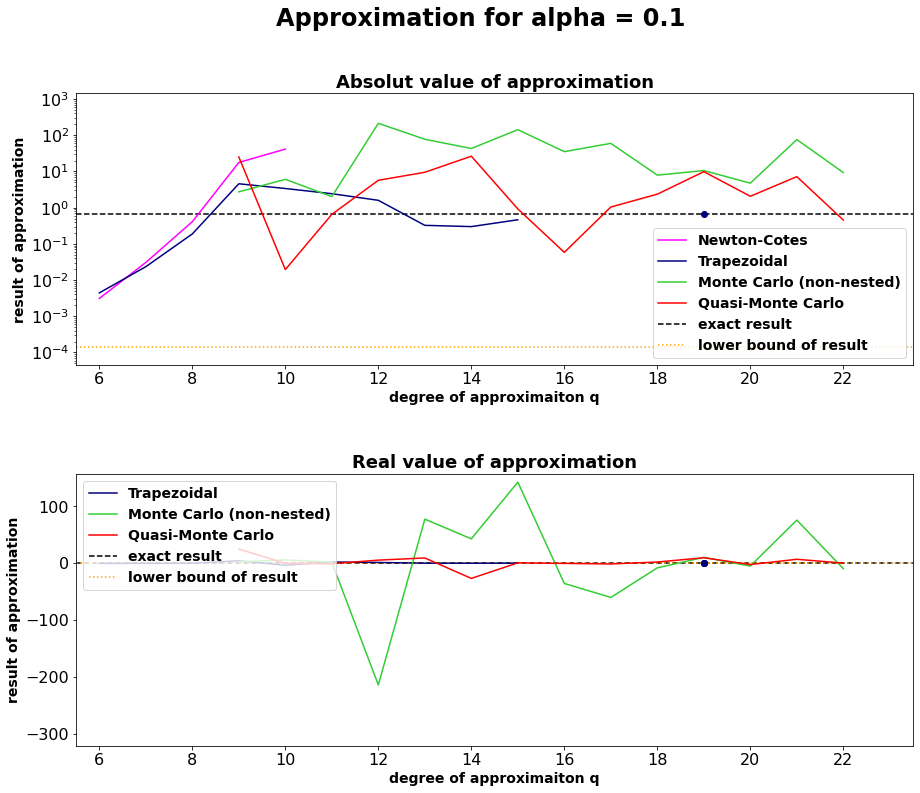

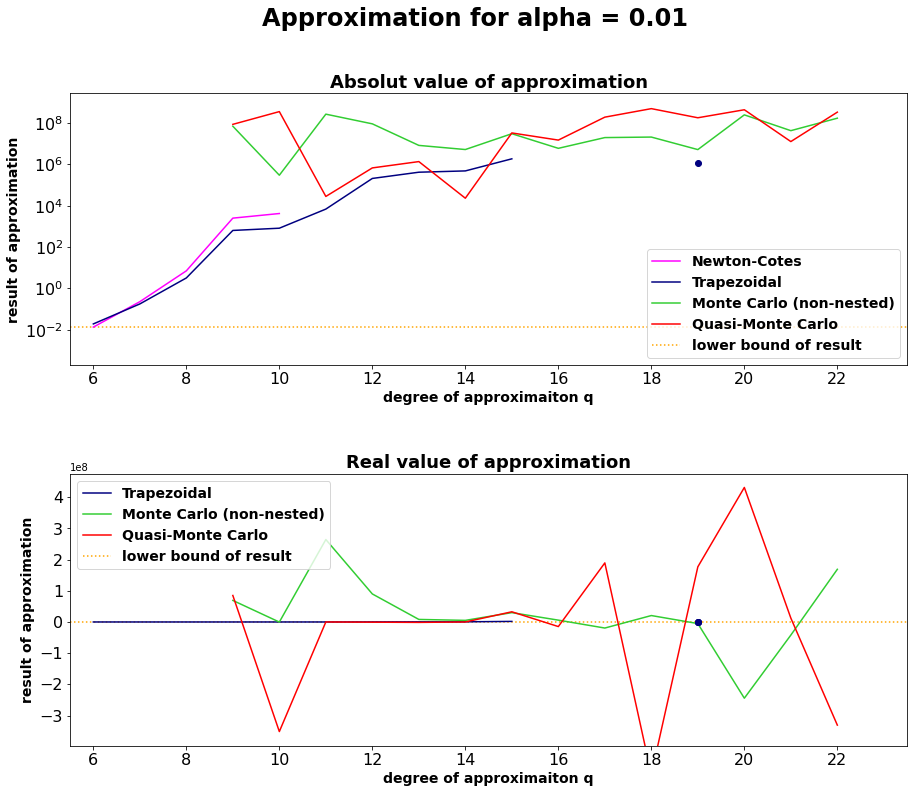

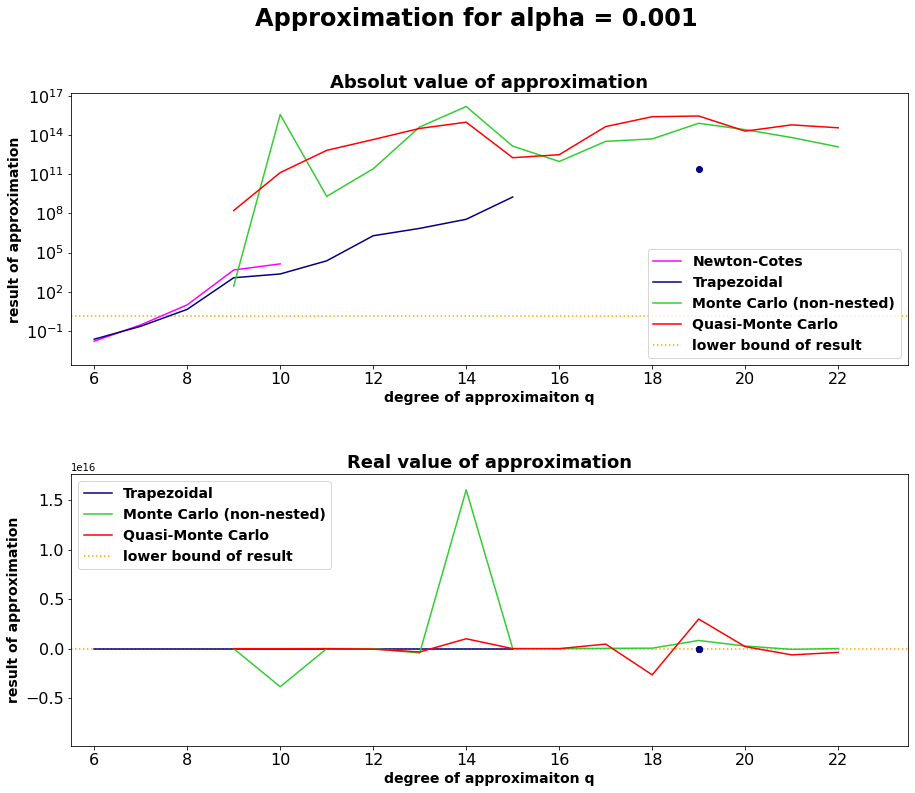

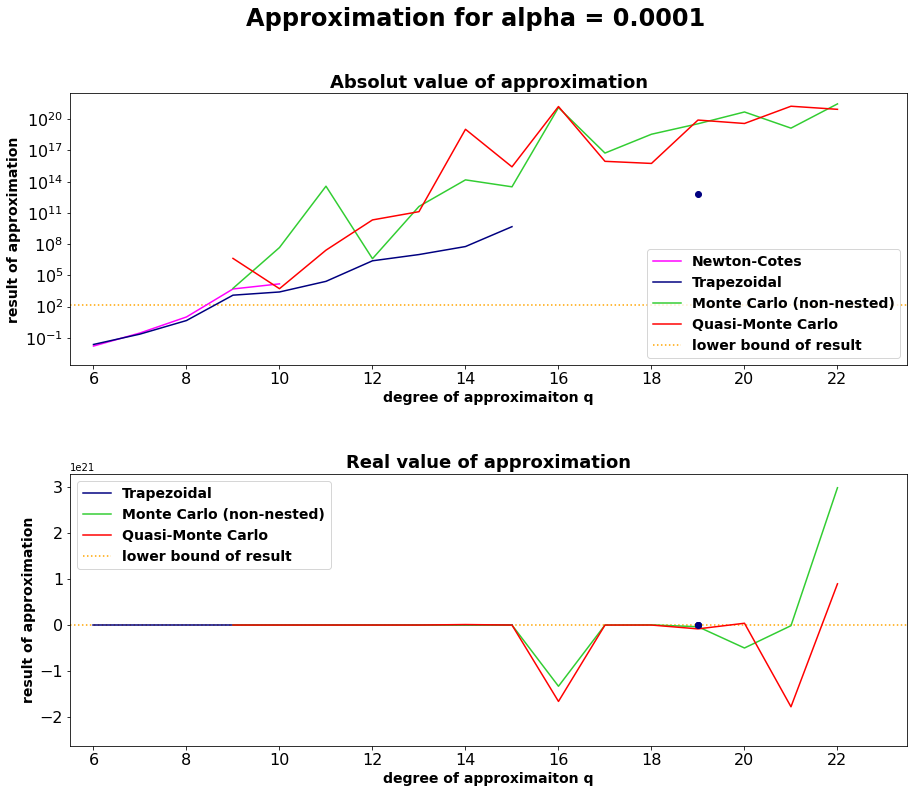

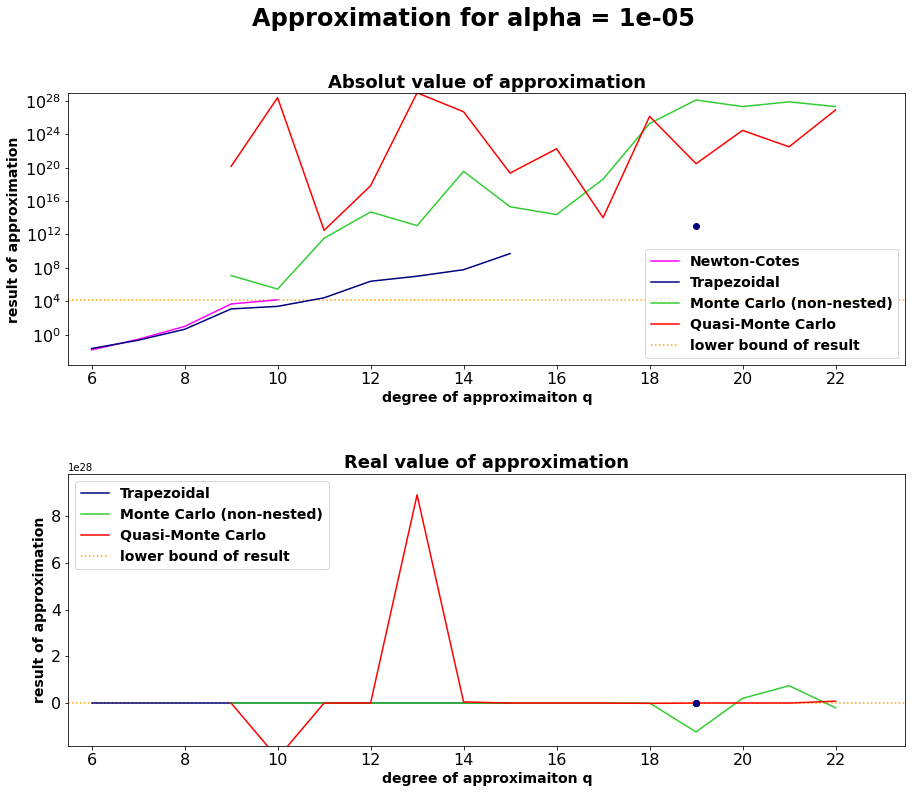

In [2]:
try:
    os.chdir("Data")
except:
    pass
# Settings needed for plotting of results.
option_list = ["Newton-Cotes", 
               "Trapezoidal",
               "Monte Carlo (non-nested)",
                "Quasi-Monte Carlo"]
color_str = [ "fuchsia", "navy", "limegreen", "red"]
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# Load the result the integration of the function calculated by scipy methode nquad
result_scipy_calc_basic = bearcats.read_pickle("integral_Coulomb_alpha_"+str(alpha[0])+".pkl")


for k_1 in range(len(alpha)):
    # Load single approximation of the PCP different alphas and a wider range of degree of approximation q. 
    data = bearcats.read_pickle("test_higher_dim_approx_alpha_"+ str(alpha[k_1]) +".pkl")

    # Integral could only be  calculated relative exactly by the nquad for the first 2 alphas.
    if k_1 < 2:
        result_scipy_calc = bearcats.read_pickle("integral_Coulomb_alpha_"+str(alpha[k_1])+".pkl")
    # For alpha < 1 the PCP was approximated using the trapezoidal quadrature and q = 19. Higher approximations 
    # would easily have taken about 5 hours.
    if k_1  >0:
        single_approx_trap = bearcats.read_pickle("test_higher_dim_approx_one_alpha_" + str(alpha[k_1]) + "_only_trap.pkl").Trapezoidal[0]
        
    fig = plt.figure(figsize=(15,12))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
   
    #  First figure showing the absolut value of the approx in a logarithmical scale 
    plt.subplot(2,1,1)

    
    for k_2 in range(len(option_list)):
        
        approx = data[option_list[k_2]][0][:17,0]
        error = data[option_list[k_2]][0][:17,1]

        end_of_approx = np.where(approx==0)[0][0]
        
        if end_of_approx ==0:
            end_of_approx = np.where(approx==0)[0][-1]+1
        
        if k_2 < 2:
            plt.plot(list(range(6,6+end_of_approx)), abs(approx[:end_of_approx]), color = color_str[k_2], label=option_list[k_2])
        
        else:
            plt.plot(list(range(6+end_of_approx,6+17)), abs(approx[end_of_approx:]), color = color_str[k_2], label=option_list[k_2])
    
    if k_1 >0:
        plt.plot(6+13, abs(single_approx_trap[0]), color="navy", marker="o")
    
    if k_1 <2:
        plt.hlines(result_scipy_calc[0], xmin =  5.5, xmax= 6.5+17, linestyles="--", color= "black", label="exact result")
    
    if k_1 > 0: 
        plt.hlines(result_scipy_calc_basic[0]*6*(0.1**(-2))**int(np.log10(alpha[0]/alpha[k_1])), xmin =  5.5, xmax= 6.5+17, linestyles=":", color= "orange", label="lower bound of result")

    plt.xlim(5.5,6.5+17)
    plt.ylim(np.min(abs(data[option_list[1]][0][np.where(data[option_list[1]][0][:,0]!=0)][:,0]))
                     /100,np.max(data[option_list[2]][0][:,0])*10)
    plt.legend(loc=4, prop={"size":14, "weight":"bold"})
    plt.ylabel("result of approximation",fontsize = 14,fontweight = "bold")
    plt.xlabel("degree of approximaiton q",fontsize = 14,fontweight = "bold")
    plt.yscale("log")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("Absolut value of approximation" , fontsize=18,fontweight="bold")

    # Second subplot showing the absolut values. 
    plt.subplot(2,1,2)

    for k_2 in range(1, len(option_list)):
        approx = data[option_list[k_2]][0][:17,0]
        error = data[option_list[k_2]][0][:17,1]
        end_of_approx = np.where(approx==0)[0][0]
        
        if end_of_approx ==0:
            end_of_approx = np.where(approx==0)[0][-1]+1

        if k_2 < 2:
            plt.plot(list(range(6,6+end_of_approx)), approx[:end_of_approx], color = color_str[k_2], label=option_list[k_2])
        
        else:
            plt.plot(list(range(6+end_of_approx,6+17)), approx[end_of_approx:], color = color_str[k_2], label=option_list[k_2])
    
        if k_1 >0:
            plt.plot(6+13, single_approx_trap[0], color="navy", marker="o")

    plt.xlim(5.5,6.5+17)
    plt.ylim(np.min([np.max(data[option_list[2]][0][np.where(data[option_list[2]][0][:17,0]!=0),0])- abs(
        np.min(data[option_list[2]][0][np.where(data[option_list[2]][0][:17,0]!=0),0])-np.max(data[option_list[2]][0][
            np.where(data[option_list[2]][0][:17,0]!=0),0]))*1.3,0]),np.max([np.max(data[option_list[2]][0][:17,0])*1.1,np.max(data[option_list[3]][0][:17,0])*1.1]))
    
    if k_1 < 2:
        plt.hlines(result_scipy_calc[0], xmin =  5.5, xmax= 6.5+17, linestyles="--", color= "black", label="exact result")
    
    if k_1 > 0: 
        plt.hlines(result_scipy_calc_basic[0]*6*(0.1**(-2))**int(np.log10(alpha[0]/alpha[k_1])), xmin =  5.5, xmax= 6.5+17, linestyles=":", color= "orange", label="lower bound of result")
    
    plt.legend(loc=2, prop={"size":14, "weight":"bold"})
    plt.ylabel("result of approximation",fontsize = 14,fontweight = "bold")
    plt.xlabel("degree of approximaiton q",fontsize = 14,fontweight = "bold")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ticklabel_format(style="sci", axis="both")
    plt.title("Real value of approximation", fontsize=18,fontweight="bold")

    fig.suptitle("Approximation for alpha = " + str(alpha[k_1]), fontsize=24,fontweight="bold")



    plt.show()

Often the deterministic quadratures the Smolyak algorithm seems approximate the integral for bigger $\alpha$ in a proper way. Never the less the error bounds are far away from being sufficiently small. In most cases these are bigger than the absolute value of the results. For alpha = 0.01 even the approximation using the trapezoidal algorithm for q = 19 is negative. 

Especially the result for the non-deterministic quadratures are varying by several orders of magnitude. Aaprt from this the error estimation for the non-deterministic quadratures are also varying  by several magnitudes depending on whether the  estimation of the variance includes points near the maximum of the function. In this case it is not possible to say, applying these has advantages compared to especially the trapezoidal quadrature.    

It should be noted, that reducing the number of points used by  the one dimensional quadratures for  q = 1 for this function implies that for q < 4 the result of the approximation is 0. 

For the sake of completeness, we show the error estimation of the different algorithms below. 

## Error estimation

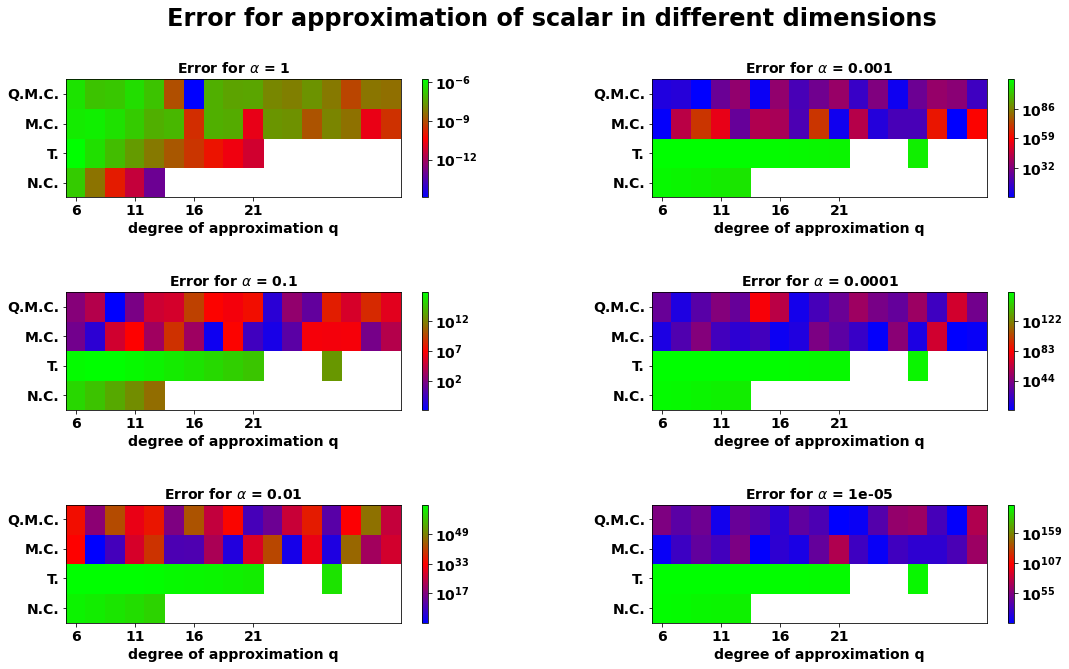

In [3]:
plt.rc('font', size=14, weight="bold")
approx_simple_highdim_fct = bearcats.read_pickle("integral_over_one.pkl")

alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
fig, ax = plt.subplots(3,2,figsize=(18,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for k_1 in range(len(alpha)):
    data = bearcats.read_pickle("test_higher_dim_approx_alpha_"+ str(alpha[k_1]) +".pkl")
    if k_1 < 2:
        result_scipy_calc = bearcats.read_pickle("integral_Coulomb_alpha_"+str(alpha[k_1])+".pkl")

    
    error = list()
    for k_2 in range(len(option_list)):
        error.append(data[option_list[k_2]][0][:17,1])
    error = np.vstack(error)
    
    if k_1  >0:
        single_approx_trap = bearcats.read_pickle("test_higher_dim_approx_one_alpha_" + str(alpha[k_1]) + "_only_trap.pkl").Trapezoidal[0]
        error[1,13]  =  single_approx_trap[1]
   
    plt.subplots_adjust(hspace=0.8, wspace=0.4)

    mat = ax[(k_1)%3, int((k_1)/3)].pcolor(error,norm=colors.LogNorm(vmin=error[error!=0].min(), vmax=error.max()),
                   cmap='brg')
    fig.colorbar(mat, ax=ax[(k_1)%3, int((k_1)/3)])
    
    ax[(k_1)%3, int((k_1)/3)].set_yticks([0.5,1.5,2.5,3.5])
    ax[(k_1)%3, int((k_1)/3)].set_yticklabels(["N.C.","T.", "M.C.", "Q.M.C."],fontsize=14, fontweight="bold")
    ax[(k_1)%3, int((k_1)/3)].set_xlabel("degree of approximation q",fontsize=14, fontweight="bold")
    ax[(k_1)%3, int((k_1)/3)].set_xticks([0.5,3.5,6.5,9.5])
    ax[(k_1)%3, int((k_1)/3)].set_xticklabels([6,6+5,6+10,6+15],fontsize=14, fontweight="bold")
    ax[(k_1)%3, int((k_1)/3)].set_title(r"Error for $\alpha$ = "+ str(alpha[k_1]),fontsize=14, fontweight="bold")
    
fig.suptitle("Error for approximation of scalar in different dimensions\n", fontsize=24,fontweight="bold")

plt.show()

## Algorithm used for calculation of data

Below you see the algorithm, with which the integral was approximated. 

In [4]:
'''
import Methodes.Smolyak_one as Smolyak_one
print("remove quotes, if you want to generate data.")
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
dim = 6
option_list = ["Newton-Cotes", 
               "Trapezoidal",
               "Monte Carlo (non-nested)",
                "Quasi-Monte Carlo"]

degree_of_approx = [5, 10, 17, 17, 17]
approx_result = np.zeros((max(degree_of_approx),len(option_list),2))

for k_3 in range( len(alpha)):
    print("")
    print("alpha = "+ str(alpha[k_3]))
    print("")
    prefactor = np.sum(np.array(list(range(1,6)))+0.5)
    function_string = str(prefactor) + " * ((z_1 - z_4) ** 4 * (z_2 - z_5) ** 4  * (z_3 - z_6)**4)/(((z_1 - z_4) ** 2 + (z_2 - z_5) ** 2 + (z_3 - z_6) ** 2 + " + str(alpha[k_3])+ ") ** (13))"
    variables_string = "(z_1 , z_2 , z_3, z_4 , z_5, z_6)"

    for k_1  in range(len(option_list)):
        print(option_list[k_1])
        for k_2 in range(degree_of_approx[k_1]):
            approx_result[k_2,k_1,:] = Smolyak_one.controller_smolyak(function_string, variables_string, option_list[k_1], k_2 + 6)[0:2]
            print(approx_result[k_2,k_1,:])
    data = {"Newton-Cotes": [approx_result[:,0,:]],"Trapezoidal": [approx_result[:,1,:]], "Monte Carlo (non-nested)": [approx_result[:,2,:]],"Quasi-Monte Carlo": [approx_result[:,3,:]]}
    data = bearcats.DataFrame(data=data)
    bearcats.to_pickle(data,"test_higher_dim_approx_alpha_"+ str(alpha[k_3]) +".pkl") 
'''
'''
import scipy
import numpy as np
import pandas as bearcats
alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
dim = 6

approx_result = np.zeros((max(degree_of_approx),len(option_list),2))

for k_3 in range(2,len(alpha)):

    prefactor = np.sum(np.array(list(range(1,6)))+0.5)
    function_string = str(prefactor) + " * ((z_1 - z_4) ** 4 * (z_2 - z_5) ** 4  * (z_3 - z_6)**4)/(((z_1 - z_4) ** 2 + (z_2 - z_5) ** 2 + (z_3 - z_6) ** 2 + " + str(alpha[k_3])+ ") ** (13))"
    variables_string = "(z_1 , z_2 , z_3, z_4 , z_5, z_6)"
    f = Smolyak_one.rewrite_function(function_string, variables_string)[0]
    borders = [[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]
    integral = scipy.integrate.nquad(f, borders, opts = {"epsrel": 1/alpha[k_3]**2, "epsabs": 3e4/(alpha[k_3])**2, "limit": 1 })
    print(integral)
    bearcats.to_pickle(integral,"integral_Coulomb_alpha_"+str(alpha[k_3])+".pkl"
'''
print("Remove quotes to approximate function either using the Smolyak algorithm or the scipy.integral package in python.")

Remove quotes to approximate function either using the Smolyak algorithm or the scipy.integral package in python.
